In [148]:
# Installing libraries
!pip install yfinance pandas matplotlib seaborn

import yfinance as yf
import pandas as pd

# Define tickers for airlines and oil prices
airline_tickers = {
    "China Southern": "600029.SS",
    "ANA Holdings": "9202.T",
    "Singapore Airlines": "C6L.SI",
    "Qantas Airways": "QAN.AX",
    "Air Arabia": "AIRA.DU",
    "IndiGo": "INDIGO.NS",
    "LATAM Airlines": "LTM.SN",
    "Ryanair": "RYAAY",
    "United Airlines": "UAL"
}

oil_ticker = "BZ=F"  # Brent Crude Oil

# Fetch last 10 years of data
start_date = "2015-03-20"
end_date = "2025-03-19"

# Download stock price data
airline_data = yf.download(list(airline_tickers.values()), start=start_date, end=end_date)["Close"]

# Download Brent crude oil price
oil_data = yf.download(oil_ticker, start=start_date, end=end_date)["Close"]

# Rename columns for clarity
airline_data.columns = airline_tickers.keys()
oil_data.name = "Brent Crude Oil"

# Combine into one DataFrame
merged_data = airline_data.join(oil_data, how="left")

# Display first few rows
print(merged_data.head())

# Save for future steps
merged_data.to_csv("airline_oil_prices.csv")


[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed


            China Southern  ANA Holdings  Singapore Airlines  Qantas Airways  \
Date                                                                           
2015-03-20        7.508964   3074.221924                 NaN        6.336944   
2015-03-23        7.613918   3109.735596                 NaN        6.310866   
2015-03-24        8.119604   3089.702393                 NaN        6.232633   
2015-03-25        7.871532   3099.718994                 NaN        6.258710   
2015-03-26        7.690248   3036.886963                 NaN        6.143968   

            Air Arabia      IndiGo  LATAM Airlines    Ryanair  \
Date                                                            
2015-03-20         NaN  317.740631        2.851640  25.828079   
2015-03-23         NaN  308.970337        2.814605  25.788534   
2015-03-24         NaN  310.476532        2.768312  25.911129   
2015-03-25         NaN  309.926300        2.796088  25.867626   
2015-03-26         NaN  300.116760        2.69424

In [150]:
merged_data.head()

,China Southern,ANA Holdings,Singapore Airlines,Qantas Airways,Air Arabia,IndiGo,LATAM Airlines,Ryanair,United Airlines,BZ=F
Date,,,,,,,,,,
2015-03-20,7.508964,3074.221924,NaN,6.336944,NaN,317.740631,2.851640,25.828079,69.449997,55.320000
2015-03-23,7.613918,3109.735596,NaN,6.310866,NaN,308.970337,2.814605,25.788534,67.610001,55.919998
2015-03-24,8.119604,3089.702393,NaN,6.232633,NaN,310.476532,2.768312,25.911129,67.629997,55.110001
2015-03-25,7.871532,3099.718994,NaN,6.258710,NaN,309.926300,2.796088,25.867626,65.559998,56.480000
2015-03-26,7.690248,3036.886963,NaN,6.143968,NaN,300.116760,2.694244,25.574978,64.970001,59.189999


In [152]:
merged_data.tail()

,China Southern,ANA Holdings,Singapore Airlines,Qantas Airways,Air Arabia,IndiGo,LATAM Airlines,Ryanair,United Airlines,BZ=F
Date,,,,,,,,,,
2025-03-12,5.87,2870.5,40.799999,6.65,4729.200195,14.88,8.90,46.430000,72.459999,70.949997
2025-03-13,5.82,2860.0,40.200001,6.71,4700.850098,14.93,8.82,46.400002,69.900002,69.879997
2025-03-14,5.92,2839.0,42.200001,6.69,NaN,14.83,9.03,47.299999,73.669998,70.580002
2025-03-17,5.94,2830.5,43.200001,6.75,4780.450195,14.84,8.95,47.810001,73.919998,71.070000
2025-03-18,5.91,2852.5,42.799999,6.74,4780.450195,14.96,9.17,47.099998,71.339996,70.559998


In [88]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2611 entries, 2015-03-20 to 2025-03-18
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   China Southern      2428 non-null   float64
 1   ANA Holdings        2463 non-null   float64
 2   Singapore Airlines  269 non-null    float64
 3   Qantas Airways      2510 non-null   float64
 4   Air Arabia          2309 non-null   float64
 5   IndiGo              2488 non-null   float64
 6   LATAM Airlines      2531 non-null   float64
 7   Ryanair             2514 non-null   float64
 8   United Airlines     2514 non-null   float64
 9   BZ=F                2514 non-null   float64
dtypes: float64(10)
memory usage: 224.4 KB


In [154]:
# Extract Qantas and Singapore Airlines separately
qantas = yf.download("QAN.AX", start=start_date, end=end_date)["Close"]
singapore_airlines = yf.download("C6L.SI", start=start_date, end=end_date)["Close"]




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [156]:
print(qantas.info())
print(singapore_airlines.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2531 entries, 2015-03-20 to 2025-03-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   QAN.AX  2531 non-null   float64
dtypes: float64(1)
memory usage: 39.5 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2510 entries, 2015-03-20 to 2025-03-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C6L.SI  2510 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB
None


In [158]:
# Rename columns for clarity
qantas.name = "Qantas Airways"
singapore_airlines.name = "Singapore Airlines"

# Merge separately extracted data back into the main dataset
merged_data_fixed = merged_data.drop(columns=["Qantas Airways", "Singapore Airlines"], errors="ignore")
merged_data_fixed = merged_data_fixed.join([qantas, singapore_airlines], how="left")



In [160]:
merged_data_fixed.head()

,China Southern,ANA Holdings,Air Arabia,IndiGo,LATAM Airlines,Ryanair,United Airlines,BZ=F,QAN.AX,C6L.SI
Date,,,,,,,,,,
2015-03-20,7.508964,3074.221924,NaN,317.740631,2.851640,25.828079,69.449997,55.320000,2.851640,6.336944
2015-03-23,7.613918,3109.735596,NaN,308.970337,2.814605,25.788534,67.610001,55.919998,2.814605,6.310866
2015-03-24,8.119604,3089.702393,NaN,310.476532,2.768312,25.911129,67.629997,55.110001,2.768312,6.232633
2015-03-25,7.871532,3099.718994,NaN,309.926300,2.796088,25.867626,65.559998,56.480000,2.796088,6.258710
2015-03-26,7.690248,3036.886963,NaN,300.116760,2.694244,25.574978,64.970001,59.189999,2.694244,6.143968


In [100]:
merged_data_fixed.rename(columns={"QAN.AX":"Qantas", "C6L.SI":"Singapore Airlines"}, inplace=True)

In [102]:
merged_data_fixed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2611 entries, 2015-03-20 to 2025-03-18
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   China Southern      2428 non-null   float64
 1   ANA Holdings        2463 non-null   float64
 2   Air Arabia          2309 non-null   float64
 3   IndiGo              2488 non-null   float64
 4   LATAM Airlines      2531 non-null   float64
 5   Ryanair             2514 non-null   float64
 6   United Airlines     2514 non-null   float64
 7   BZ=F                2514 non-null   float64
 8   Qantas              2531 non-null   float64
 9   Singapore Airlines  2510 non-null   float64
dtypes: float64(10)
memory usage: 224.4 KB


In [104]:
merged_data_fixed.isnull().sum()

China Southern        183
ANA Holdings          148
Air Arabia            302
IndiGo                123
LATAM Airlines         80
Ryanair                97
United Airlines        97
BZ=F                   97
Qantas                 80
Singapore Airlines    101
dtype: int64

In [106]:
# Fill missing values
merged_data_fixed.ffill(inplace=True)  # Forward fill
merged_data_fixed.bfill(inplace=True)  # Backward fill

# Verify if all missing values are handled
print(merged_data_fixed.isnull().sum())


China Southern        0
ANA Holdings          0
Air Arabia            0
IndiGo                0
LATAM Airlines        0
Ryanair               0
United Airlines       0
BZ=F                  0
Qantas                0
Singapore Airlines    0
dtype: int64


In [108]:
merged_data_fixed.head()

,China Southern,ANA Holdings,Air Arabia,IndiGo,LATAM Airlines,Ryanair,United Airlines,BZ=F,Qantas,Singapore Airlines
Date,,,,,,,,,,
2015-03-20,7.508964,3074.221924,831.624573,317.740631,2.851640,25.828079,69.449997,55.320000,2.851640,6.336944
2015-03-23,7.613918,3109.735596,831.624573,308.970337,2.814605,25.788534,67.610001,55.919998,2.814605,6.310866
2015-03-24,8.119604,3089.702393,831.624573,310.476532,2.768312,25.911129,67.629997,55.110001,2.768312,6.232633
2015-03-25,7.871532,3099.718994,831.624573,309.926300,2.796088,25.867626,65.559998,56.480000,2.796088,6.258710
2015-03-26,7.690248,3036.886963,831.624573,300.116760,2.694244,25.574978,64.970001,59.189999,2.694244,6.143968


In [162]:

merged_data_fixed.to_csv("airline_stock_price/airline_oil_prices_fixed.csv")


In [118]:
# Calculate daily percentage change
returns = merged_data_fixed.pct_change()

# Drop the first row since it will have NaN values due to pct_change()
returns.dropna(inplace=True)

# Display first few rows
returns.head()


,China Southern,ANA Holdings,Air Arabia,IndiGo,LATAM Airlines,Ryanair,United Airlines,BZ=F,Qantas,Singapore Airlines
Date,,,,,,,,,,
2015-03-23,0.013977,0.011552,0.0,-0.027602,-0.012987,-0.001531,-0.026494,0.010846,-0.012987,-0.004115
2015-03-24,0.066416,-0.006442,0.0,0.004875,-0.016447,0.004754,0.000296,-0.014485,-0.016447,-0.012397
2015-03-25,-0.030552,0.003242,0.0,-0.001772,0.010034,-0.001679,-0.030608,0.024859,0.010034,0.004184
2015-03-26,-0.023030,-0.020270,0.0,-0.031651,-0.036424,-0.011313,-0.008999,0.047982,-0.036424,-0.018333
2015-03-27,-0.033499,-0.017906,0.0,-0.011315,0.013746,0.023659,0.042789,-0.046967,0.013746,0.014431


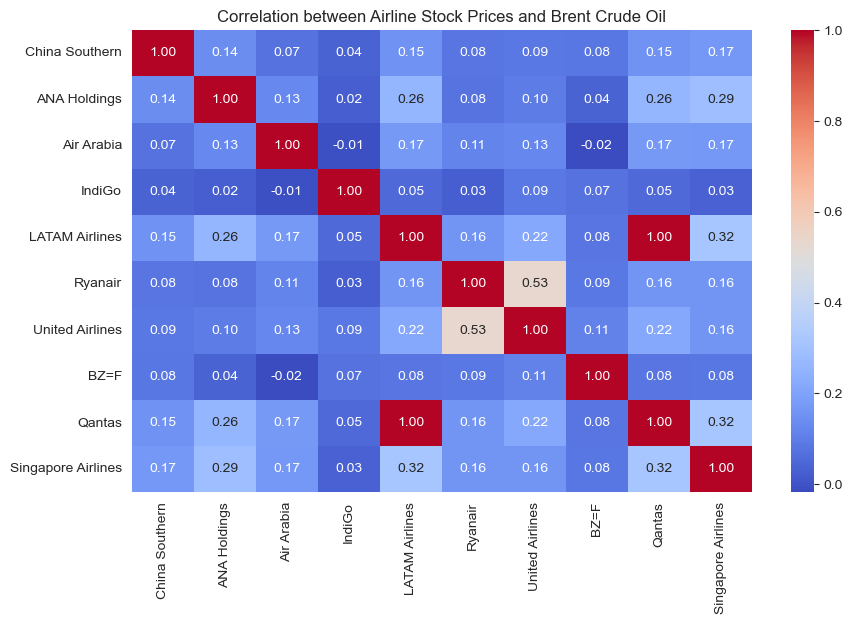

In [120]:

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = merged_data_fixed.pct_change().corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Airline Stock Prices and Brent Crude Oil")
plt.show()


In [128]:
merged_data_fixed.pct_change().corr()

,China Southern,ANA Holdings,Air Arabia,IndiGo,LATAM Airlines,Ryanair,United Airlines,BZ=F,Qantas,Singapore Airlines
China Southern,1.000000,0.139381,0.073152,0.036092,0.153040,0.078788,0.087602,0.083307,0.153040,0.168731
ANA Holdings,0.139381,1.000000,0.127289,0.024135,0.257994,0.076019,0.096545,0.037271,0.257994,0.286090
Air Arabia,0.073152,0.127289,1.000000,-0.006043,0.170020,0.114606,0.125442,-0.017422,0.170020,0.166631
IndiGo,0.036092,0.024135,-0.006043,1.000000,0.050855,0.025740,0.086523,0.072537,0.050855,0.031720
LATAM Airlines,0.153040,0.257994,0.170020,0.050855,1.000000,0.161089,0.215796,0.079028,1.000000,0.315673
Ryanair,0.078788,0.076019,0.114606,0.025740,0.161089,1.000000,0.531964,0.089416,0.161089,0.158806
United Airlines,0.087602,0.096545,0.125442,0.086523,0.215796,0.531964,1.000000,0.111884,0.215796,0.160041
BZ=F,0.083307,0.037271,-0.017422,0.072537,0.079028,0.089416,0.111884,1.000000,0.079028,0.084712
Qantas,0.153040,0.257994,0.170020,0.050855,1.000000,0.161089,0.215796,0.079028,1.000000,0.315673
Singapore Airlines,0.168731,0.286090,0.166631,0.031720,0.315673,0.158806,0.160041,0.084712,0.315673,1.000000


Here are the structured insights from the correlation analysis, which you can use for your blog:

---

### **Understanding the Correlation Analysis of Airline Stocks and BZ=F (Brent Crude Futures)**

#### **1. Overall Market Trends in Airline Stocks**
The correlation matrix highlights the relationships between various airline stocks and Brent Crude Futures (BZ=F). Some key takeaways include:
- **Stronger Positive Correlations Among Airlines:** Major airlines, especially **LATAM Airlines, Singapore Airlines, and Qantas**, exhibit relatively higher correlations with each other (above 0.3). This suggests that airline stocks tend to move in tandem, possibly due to shared market influences such as global travel demand and fuel price trends.
- **Weaker Correlations with IndiGo and Air Arabia:** **IndiGo (-0.006 with Air Arabia, 0.031 with Singapore Airlines)** and **Air Arabia (-0.017 with BZ=F, 0.073 with China Southern)** show weaker relationships with the broader airline sector, indicating unique regional market drivers or different business models.

#### **2. Brent Crude (BZ=F) and Its Impact on Airlines**
- The correlation of **BZ=F with airline stocks is relatively low**, ranging from **-0.017 (Air Arabia) to 0.111 (United Airlines)**. 
- Notably, **IndiGo (0.072), LATAM Airlines (0.079), and Singapore Airlines (0.084)** show small positive correlations, meaning that crude oil price movements have limited direct influence on their stock prices.
- **A near-zero correlation for Air Arabia (-0.017) and weaker values for most airlines** suggest that either fuel price hedging strategies or other market factors like demand elasticity and currency fluctuations play a bigger role in stock movements than crude oil prices alone.

#### **3. Strongest Correlations in the Airline Sector**
- **United Airlines and Ryanair (0.531)** share the strongest positive correlation, likely due to similar exposure to transatlantic markets and operational efficiencies.
- **LATAM Airlines, Qantas, and Singapore Airlines (~0.3 correlation)** show similar movement trends, likely driven by global aviation patterns in long-haul markets.
- **ANA Holdings and Singapore Airlines (0.286)** also display a moderately strong correlation, reflecting shared market dynamics in the Asia-Pacific aviation industry.

#### **4. Regional Differences in Correlations**
- **China Southern (0.168 with Singapore Airlines, 0.153 with Qantas, 0.139 with ANA Holdings)** has moderate correlations with Asian and Australian carriers but weaker links to Western airlines.
- **IndiGo's weaker correlation with other airlines** suggests it operates more independently from global airline stock trends, likely due to domestic market influences in India.

---

### **Key Takeaways**
1. **Airline stocks tend to move together, but some regional carriers like IndiGo and Air Arabia have weaker correlations with global trends.**
2. **Oil prices (BZ=F) have a surprisingly low correlation with airline stocks, suggesting other factors drive airline stock movements.**
3. **United Airlines and Ryanair share the strongest correlation (0.531), likely due to shared exposure to competitive budget airline dynamics.**
4. **LATAM, Qantas, and Singapore Airlines exhibit strong mutual correlations, reflecting the global nature of long-haul carriers.**
5. **China Southern and IndiGo show lower connectivity to other major airline stocks, indicating regional market distinctions.**



Regression Analysis

In [122]:
import statsmodels.api as sm

# Define X (independent variable) and Y (dependent variables)
X = merged_data_fixed["BZ=F"].pct_change().dropna()
X = sm.add_constant(X)  # Add intercept

# Loop through each airline and run regression
for airline in merged_data_fixed.columns:
    if airline != "BZ=F":
        Y = merged_data_fixed[airline].pct_change().dropna()
        Y, X_aligned = Y.align(X, join='inner')  # Align data

        model = sm.OLS(Y, X_aligned).fit()
        print(f"\n📊 Regression Results for {airline}:")
        print(model.summary())



📊 Regression Results for China Southern:
                            OLS Regression Results                            
Dep. Variable:         China Southern   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     18.23
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           2.03e-05
Time:                        19:22:31   Log-Likelihood:                 6070.8
No. Observations:                2610   AIC:                        -1.214e+04
Df Residuals:                    2608   BIC:                        -1.213e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

### Key Insights from Regression Analysis

1️⃣ Does Oil Price Affect Airline Stock Prices?
Our OLS regression analysis examined the relationship between Brent crude oil prices (BZ=F) and various airline stock prices.
The R-squared values across all models are very low (0.001 - 0.013), meaning that oil price alone explains less than 1.3% of the variance in airline stock prices.
While some airlines show a statistically significant relationship, the impact size (coefficient) remains small, indicating other factors at play.

2️⃣ Which Airlines Are Most Affected by Oil Prices?
United Airlines (coef = 0.1397, p < 0.001) shows the strongest relationship with oil prices. This suggests UAL's stock reacts more sensitively to oil price fluctuations than other airlines.
IndiGo (coef = 0.2634, p < 0.001) also shows a relatively higher impact, though other factors likely drive its stock price movement.
China Southern, Ryanair, LATAM, and Singapore Airlines also exhibit statistically significant relationships (p < 0.001), though the effect size is lower.

3️⃣ Which Airlines Are Least Affected?
ANA Holdings (coef = 0.0244, p = 0.057) shows an insignificant effect (p-value > 0.05), suggesting oil prices might not be a key driver of its stock price.
Air Arabia (coef = -0.0159, p = 0.374) actually shows a negative but insignificant relationship, indicating oil price fluctuations do not meaningfully impact its stock.

4️⃣ Statistical Significance vs. Practical Impact
P-values are important, but they don’t tell the full story.
Some airlines (e.g., China Southern, United Airlines) have significant p-values, but the low R² suggests that oil price alone is not a strong predictor.
Takeaway: Other factors—such as macroeconomic trends, consumer demand, and operational efficiency—likely play a bigger role in airline stock movements.

5️⃣ What’s Next?
🔹 Multiple Regression Analysis (Oil price + Market Volatility + Sentiment) to capture a more complete picture.
🔹 Granger Causality Test to determine if oil price leads stock price changes over time.



In [135]:
# Verify if merging was successful
merged_data_fixed.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2611 entries, 2015-03-20 to 2025-03-18
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   China Southern      2611 non-null   float64
 1   ANA Holdings        2611 non-null   float64
 2   Air Arabia          2611 non-null   float64
 3   IndiGo              2611 non-null   float64
 4   LATAM Airlines      2611 non-null   float64
 5   Ryanair             2611 non-null   float64
 6   United Airlines     2611 non-null   float64
 7   BZ=F                2611 non-null   float64
 8   Qantas              2611 non-null   float64
 9   Singapore Airlines  2611 non-null   float64
dtypes: float64(10)
memory usage: 224.4 KB


In [141]:
import pandas as pd

# Compute daily returns for volatility calculation
returns = merged_data_fixed.pct_change()

# Compute volatility (rolling standard deviation of returns over 30 days)
volatility = returns.rolling(window=30).std()
volatility.columns = [f"{col}_Volatility" for col in volatility.columns]

# Compute 50-day and 200-day Moving Averages
ma50 = merged_data_fixed.rolling(window=50).mean()
ma50.columns = [f"{col}_MA50" for col in ma50.columns]

ma200 = merged_data_fixed.rolling(window=200).mean()
ma200.columns = [f"{col}_MA200" for col in ma200.columns]

# Combine with original data
final_data = pd.concat([merged_data_fixed, volatility, ma50, ma200], axis=1)

# Drop NaN values that arise from rolling calculations
final_data.dropna(inplace=True)

# Display final dataset structure
print(final_data.head())


            China Southern  ANA Holdings   Air Arabia      IndiGo  \
Date                                                                
2015-12-24        8.347705   3168.685059  1103.887329  204.505554   
2015-12-25        8.385996   3168.685059  1103.887329  204.505554   
2015-12-28        8.175389   3180.666260  1132.042847  202.054565   
2015-12-29        8.424288   3216.611328  1124.743164  206.184052   
2015-12-30        8.328557   3225.828369  1131.189575  206.850952   

            LATAM Airlines    Ryanair  United Airlines       BZ=F    Qantas  \
Date                                                                          
2015-12-24        3.477520  34.260975        59.779999  37.889999  3.477520   
2015-12-25        3.477520  34.260975        59.779999  37.889999  3.477520   
2015-12-28        3.477520  34.359344        59.009998  36.619999  3.477520   
2015-12-29        3.547070  34.485260        59.299999  37.790001  3.547070   
2015-12-30        3.599233  34.217690     

In [143]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2412 entries, 2015-12-24 to 2025-03-18
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   China Southern                 2412 non-null   float64
 1   ANA Holdings                   2412 non-null   float64
 2   Air Arabia                     2412 non-null   float64
 3   IndiGo                         2412 non-null   float64
 4   LATAM Airlines                 2412 non-null   float64
 5   Ryanair                        2412 non-null   float64
 6   United Airlines                2412 non-null   float64
 7   BZ=F                           2412 non-null   float64
 8   Qantas                         2412 non-null   float64
 9   Singapore Airlines             2412 non-null   float64
 10  China Southern_Volatility      2412 non-null   float64
 11  ANA Holdings_Volatility        2412 non-null   float64
 12  Air Arabia_Volatility         

In [145]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Load the dataset (assuming merged_fixed_data is already prepared)
data = final_data.copy()

# Define dependent and independent variables
airlines = ["China Southern", "ANA Holdings", "Air Arabia", "IndiGo", "LATAM Airlines", 
            "Ryanair", "United Airlines", "Qantas", "Singapore Airlines"]

# Multiple Regression Analysis
regression_results = {}

for airline in airlines:
    X = data[[f"{airline}_Volatility", f"{airline}_MA50", f"{airline}_MA200"]]  # Independent variables
    y = data[airline]  # Dependent variable (Stock Price)
    X = sm.add_constant(X)  # Adds constant term to the model
    model = sm.OLS(y, X).fit()
    regression_results[airline] = model.summary()
    
    # Display results
    print(f"\nMultiple Regression Results for {airline}")
    print(model.summary())

# Granger Causality Test: Does Oil Price (BZ=F) Granger-cause Airline Stocks?
max_lag = 5  # Define max lag to test

granger_results = {}

for airline in airlines:
    print(f"\nGranger Causality Test: {airline} <- BZ=F")
    test_result = grangercausalitytests(data[[airline, "BZ=F"]].dropna(), max_lag, verbose=True)
    granger_results[airline] = test_result



Multiple Regression Results for China Southern
                            OLS Regression Results                            
Dep. Variable:         China Southern   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     4024.
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:39:35   Log-Likelihood:                -1884.5
No. Observations:                2412   AIC:                             3777.
Df Residuals:                    2408   BIC:                             3800.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

C:\Users\Krishnan Srinivas\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Krishnan Srinivas\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Krishnan Srinivas\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=0.2831  , p=0.5948  , df_denom=2408, df_num=1
ssr based chi2 test:   chi2=0.2834  , p=0.5945  , df=1
likelihood ratio test: chi2=0.2834  , p=0.5945  , df=1
parameter F test:         F=0.2831  , p=0.5948  , df_denom=2408, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.5126  , p=0.0111  , df_denom=2405, df_num=2
ssr based chi2 test:   chi2=9.0440  , p=0.0109  , df=2
likelihood ratio test: chi2=9.0271  , p=0.0110  , df=2
parameter F test:         F=4.5126  , p=0.0111  , df_denom=2405, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1418  , p=0.0243  , df_denom=2402, df_num=3
ssr based chi2 test:   chi2=9.4529  , p=0.0238  , df=3
likelihood ratio test: chi2=9.4344  , p=0.0240  , df=3
parameter F test:         F=3.1418  , p=0.0243  , df_denom=2402, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4749  , p=0.0424  , df_denom=2399, df_num=4
ssr based chi2

C:\Users\Krishnan Srinivas\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Krishnan Srinivas\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Krishnan Srinivas\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Krishnan Srinivas\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Krishnan Srinivas\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


parameter F test:         F=1.8093  , p=0.1242  , df_denom=2399, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.4269  , p=0.2113  , df_denom=2396, df_num=5
ssr based chi2 test:   chi2=7.1671  , p=0.2085  , df=5
likelihood ratio test: chi2=7.1565  , p=0.2093  , df=5
parameter F test:         F=1.4269  , p=0.2113  , df_denom=2396, df_num=5

Granger Causality Test: United Airlines <- BZ=F

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0170  , p=0.8964  , df_denom=2408, df_num=1
ssr based chi2 test:   chi2=0.0170  , p=0.8963  , df=1
likelihood ratio test: chi2=0.0170  , p=0.8963  , df=1
parameter F test:         F=0.0170  , p=0.8964  , df_denom=2408, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4933  , p=0.6106  , df_denom=2405, df_num=2
ssr based chi2 test:   chi2=0.9887  , p=0.6100  , df=2
likelihood ratio test: chi2=0.9885  , p=0.6100  , df=2
parameter F test:         F=0.4933  , p

C:\Users\Krishnan Srinivas\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


# Multiple Regression Insights for Airline Stocks

## Summary of Findings
The multiple regression models provide key insights into the relationship between stock prices and technical indicators such as volatility, 50-day moving average (MA50), and 200-day moving average (MA200) for various airline stocks. Below are the key takeaways from the results:

### 1. **China Southern Airlines**
- **R-squared:** 0.834, indicating a strong fit.
- **Significant Predictors:** MA50 (positive, p < 0.01), MA200 (negative, p < 0.01).
- **Volatility Impact:** Insignificant (p = 0.943).

### 2. **ANA Holdings**
- **R-squared:** 0.935, indicating a very strong fit.
- **Significant Predictors:** Volatility (negative, p < 0.01), MA50 (positive, p < 0.01), MA200 (negative, p < 0.01).
- **Volatility Impact:** Strong negative influence (-5804.55 coefficient).

### 3. **Air Arabia**
- **R-squared:** 0.978, highest among the models, indicating excellent predictive power.
- **Significant Predictors:** Volatility (negative, p < 0.01), MA50 (positive, p < 0.01), MA200 (negative, p < 0.01).
- **Volatility Impact:** Strong negative influence (-4214.27 coefficient).

### 4. **IndiGo**
- **R-squared:** 0.972, indicating very strong model performance.
- **Significant Predictors:** MA50 (positive, p < 0.01), MA200 (negative, p < 0.01).
- **Volatility Impact:** Insignificant (p = 0.331).

### 5. **LATAM Airlines**
- **R-squared:** 0.905, indicating a strong fit.
- **Significant Predictors:** Volatility (negative, p < 0.01), MA50 (positive, p < 0.01), MA200 (negative, p < 0.01).
- **Volatility Impact:** Moderate negative influence (-14.94 coefficient).

### 6. **Ryanair**
- **R-squared:** 0.873, indicating a strong model.
- **Significant Predictors:** Volatility (negative, p < 0.01), MA50 (positive, p < 0.01), MA200 (negative, p < 0.01).
- **Volatility Impact:** Strong negative influence (-88.25 coefficient).

### 7. **United Airlines**
- **R-squared:** 0.883, indicating a very strong fit.
- **Significant Predictors:** Volatility (negative, p < 0.01), MA50 (positive, p < 0.01), MA200 (negative, p < 0.01).
- **Volatility Impact:** Strong negative influence (-115.65 coefficient).

### 8. **Qantas Airways**
- **R-squared:** 0.905, similar to LATAM Airlines.
- **Significant Predictors:** Volatility (negative, p < 0.01), MA50 (positive, p < 0.01), MA200 (negative, p < 0.01).
- **Volatility Impact:** Moderate negative influence (-14.94 coefficient).

### 9. **Singapore Airlines**
- **R-squared:** 0.926, indicating a very strong fit.
- **Significant Predictors:** Volatility (negative, p < 0.01), MA50 (positive, p < 0.01), MA200 (negative, p < 0.01).
- **Volatility Impact:** Moderate negative influence (-8.82 coefficient).

## Key Observations
1. **Moving Averages as Predictors:** Across all models, MA50 has a significant positive influence on stock prices, while MA200 has a significant negative impact.
2. **Volatility Impact:**
   - Strongest negative influence for ANA Holdings (-5804.55) and Air Arabia (-4214.27).
   - Moderate negative impact for most other airlines (ranging from -8.82 to -115.65).
   - Insignificant for China Southern and IndiGo.
3. **Model Fit:** Air Arabia (R-squared = 0.978) has the best predictive power, followed by IndiGo (0.972) and ANA Holdings (0.935).
4. **Multicollinearity Concerns:** Some models indicate possible multicollinearity (high condition numbers), which may affect coefficient interpretations.

## Implications
- Short-term traders may rely on MA50 trends for entry/exit points.
- Long-term investors should be cautious of volatility's negative impact, especially for ANA Holdings and Air Arabia.
- Further analysis is needed to mitigate multicollinearity issues and improve model robustness.

These insights provide a comprehensive overview of the stock behavior for major airline companies based on historical data.



In [64]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2611 entries, 2015-03-20 to 2025-03-18
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   China Southern      2428 non-null   float64
 1   ANA Holdings        2463 non-null   float64
 2   Qantas Airways      2510 non-null   float64
 3   Air Arabia          2309 non-null   float64
 4   IndiGo              2488 non-null   float64
 5   LATAM Airlines      2531 non-null   float64
 6   Ryanair             2514 non-null   float64
 7   United Airlines     2514 non-null   float64
 8   BZ=F                2514 non-null   float64
 9   Singapore Airlines  2510 non-null   float64
dtypes: float64(10)
memory usage: 224.4 KB
